# LAB 3 
## Eklavya Sharma
### 8902545

# PART A

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

In [2]:
# Load the dataset
df_credit = pd.read_csv('./creditcard.csv')
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## no missing values


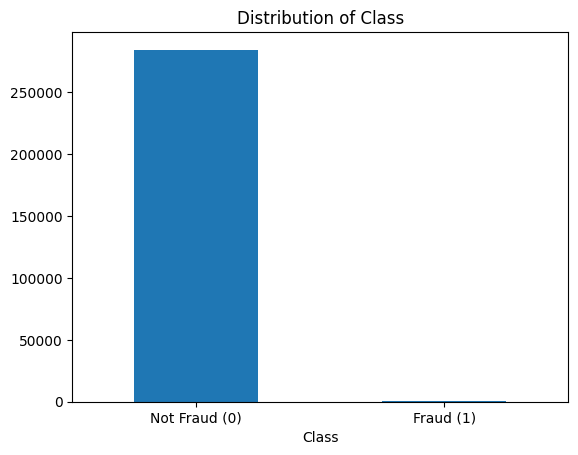

In [3]:
# Distribution of the target variable 'Class'
df_credit['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Class')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.show()

In [4]:
scaler = StandardScaler()
features_to_scale = df_credit.drop('Class', axis=1).columns

# Scale the features
df_credit_scaled = df_credit.copy()
df_credit_scaled[features_to_scale] = scaler.fit_transform(df_credit[features_to_scale])

df_credit_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [5]:
X = df_credit_scaled.drop('Class', axis=1)
y = df_credit_scaled['Class']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify=y)

X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [6]:
from sklearn.linear_model import LogisticRegression

lr_credit = LogisticRegression()

# Fit the model on the training data
lr_credit.fit(X_train, y_train)

LogisticRegression()

Confusion Matrix:
[[85277    18]
 [   62    86]]


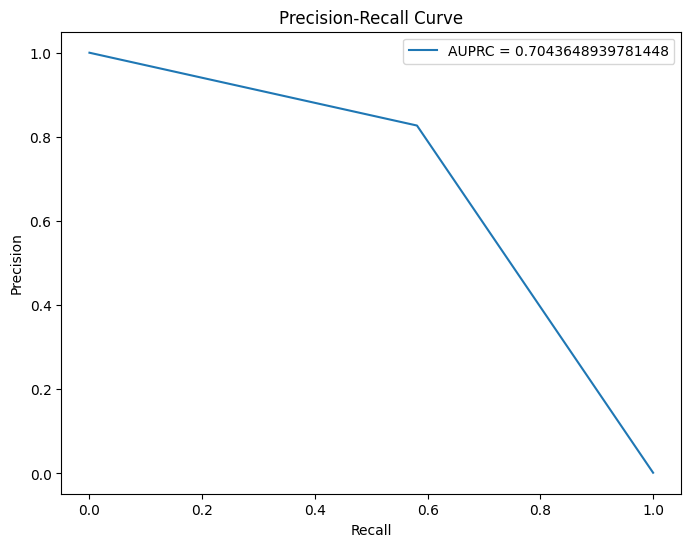

In [7]:
y_pred = lr_credit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUPRC = {auprc}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Part B

In [8]:
# Load the dataset
df = pd.read_csv('./insurance.csv')
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Some generic plots, showing distribution for categorical and numerical features , the correlation between them and between the target variable, charges

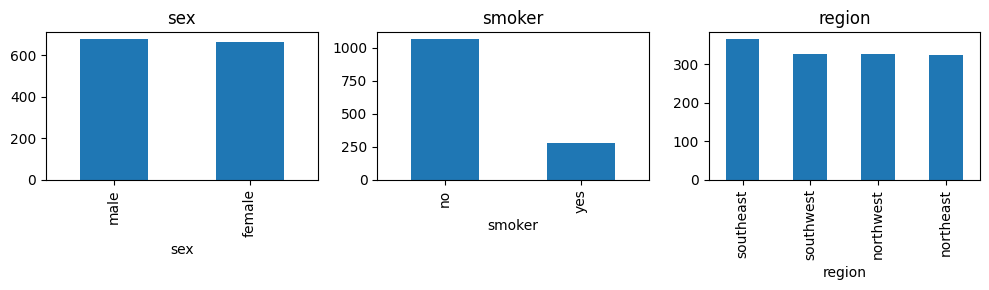

In [9]:
# Distribution of categorical variables
categorical_variables = ['sex', 'smoker', 'region']
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for i, categorical_variable in enumerate(categorical_variables):
    df[categorical_variable].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(categorical_variable)
plt.tight_layout()
plt.show()

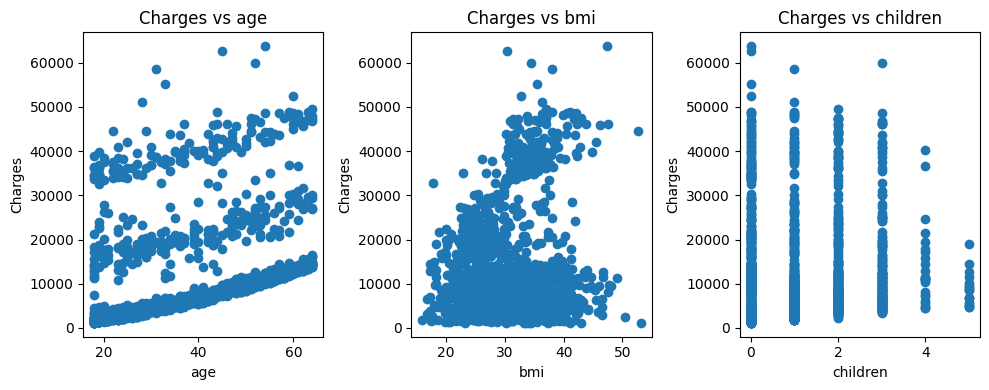

In [10]:
# Scatter plots for charges vs numerical variables
numerical_variables = ['age', 'bmi', 'children']
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for i, numerical_variable in enumerate(numerical_variables):
    axs[i].scatter(df[numerical_variable], df['charges'])
    axs[i].set_title(f'Charges vs {numerical_variable}')
    axs[i].set_xlabel(numerical_variable)
    axs[i].set_ylabel('Charges')
plt.tight_layout()
plt.show()

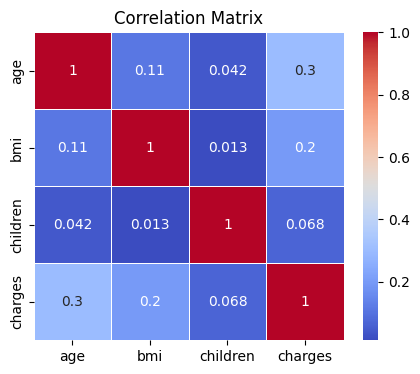

In [11]:
# Correlation matrix
numerical_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Analysis of target variable

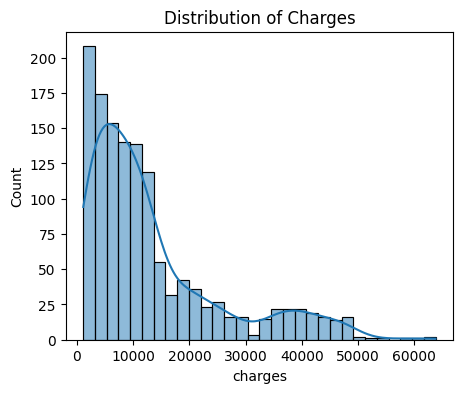

In [12]:
# Distribution of charges
plt.figure(figsize=(5,4))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.show()

#### this does not belong to normal distribution, it looks more like a pareto distribution

In [13]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Separate predictors and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the data into training set and test set as mentioned in the problem statement 70/30 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [14]:
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# Use the trained model to make predictions on the test data
y_pred = lr.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse

(4208.73452910112, 35412047.8247518, 5950.802284125377)

### as we see, the performance isn't too good. let's try something to improve it, polynomial features ( from Ryan's class )

In [16]:
# Create a pipeline with Polynomial Features and Linear Regression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred_poly = model.predict(X_test)

# Compute evaluation metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

mae_poly, mse_poly, rmse_poly


(2842.1817176927066, 20470530.19059556, 4524.437002610995)

### As we see the performance increased, the error went down by almost half